<a href="https://colab.research.google.com/github/ttarom/Anime_recommendation/blob/master/Final_version_live_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Let's mount google drive so we can read data files:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
path = "/content/drive/My Drive/Colab Notebooks/datasets_anime/df_anime_final.csv"
df_anime_final = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import time
from timeit import default_timer as timer
from time import strftime
from time import gmtime
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (15,25)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_anime_final.head()

,username,anime_id,my_score,my_status,location_x,age,genre_1,genre_x,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,location,gender_Female,gender_Male,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,score,scored_by,...,Magic,Space,Game,Sports,Ecchi,Sci-Fi,Mystery,Drama,Supernatural,Police,Demons,Horror,Psychological,Military,Hentai,Music,Dementia,Romance,Seinen,Historical,Kids,School,Thriller,Mecha,Josei,Parody,Super Power,Shounen,Samurai,Cars,Shoujo,Yaoi,Martial Arts,rating_G - All Ages,rating_None,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai
0,xETHEREALx,1185,0,6,CANADA,29,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",131,11895,21,830,48,3,438,239.719676,1991-08-08,2007-09-01 00:00:00,2015-12-28 21:31:40,7.50,0.0,14654,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
1,Jakiepoolh,1185,0,6,CANADA,19,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",165,6099700,12,92,124,1,2518,63.645833,2001-07-12,2017-03-11 00:00:00,2018-05-16 01:29:30,7.89,139.0,3836,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
2,lilstilinski,1185,10,2,CANADA,25,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",21,2250905,19,70,7,3,65,49.586806,1994-12-21,2013-03-02 00:00:00,2018-03-26 01:32:15,7.65,23.0,2971,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
3,D-ohnuts,1185,0,6,CANADA,22,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",205,3941949,0,267,6,0,2022,43.479896,1997-12-26,2014-07-19 00:00:00,2018-05-18 23:09:32,4.64,10.0,2747,CANADA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0
4,Fantomdruid,1185,8,2,USA,32,Action,"Action, Comedy, Ecchi, Sci-Fi, Shounen, Space,...",89,323166,40,949,38,0,121,199.865278,1987-09-24,2010-05-01 00:00:00,2011-02-17 02:49:00,7.36,31.0,12593,USA,0,1,Battle Athletess Daiundoukai,Battle Athletes,バトルアスリーテス大運動会,Battle Athletes OVA,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,6,Finished Airing,False,"May 25, 1997 to Jun 25, 1998","{'from': '1997-05-25', 'to': '1998-06-25'}",32 min. per ep.,6.6,1451,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0


In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#enc = OrdinalEncoder()
#df_anime_final["location_enc"] = enc.fit_transform(df_anime_final[["location_x"]])
df_anime_final_frac = df_anime_final
loc_codes, loc_uniques = pd.factorize(df_anime_final_frac['location'])
df_anime_final_frac['location'] = loc_codes
codes, uniques = pd.factorize(df_anime_final_frac['type'])
df_anime_final_frac['type'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['source'])
df_anime_final_frac['source'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['status'])
df_anime_final_frac['status'] = codes
codes, uniques = pd.factorize(df_anime_final_frac['studio'])
df_anime_final_frac['studio'] = codes
#df_anime_final_frac = df_anime_final_frac.select_dtypes(exclude=['category','object'])
df_anime_final_frac = df_anime_final_frac.groupby("anime_id").filter(lambda x: len(x) > 1000)
df_anime_final_frac = df_anime_final_frac[df_anime_final_frac['rank'].notna()].reset_index(drop=True)

y = pd.get_dummies((df_anime_final_frac.iloc[:,1]),drop_first=False)
X = df_anime_final_frac[['age','location','gender_Female','gender_Male','Action','Comedy','Harem','Adventure','Fantasy','Slice of Life','Magic','Space','Game','Sports','Ecchi','Sci-Fi','Mystery','Drama','Supernatural','Police','Demons','Horror','Psychological','Military','Hentai','Music','Dementia','Romance','Seinen','Historical','Kids','School','Thriller','Mecha','Josei','Parody','Super Power','Shounen','Samurai','Cars','Shoujo','Yaoi','Martial Arts']]
choice_dict = {}
count = 0

for s in X.columns:
  choice_dict[count] = s  
  count+=1 
#Begin
print(choice_dict)
#Age
print("please enter your age: ")
t_age = int(input())
#location
print("please enter your location: ")
location_mapper = pd.DataFrame(list(zip(loc_codes,df_anime_final['location_x']))).rename({0:'code',1:'location'},axis=1).drop_duplicates().reset_index(drop=True)
temp = input().strip().upper()
t_location=int(location_mapper[location_mapper['location']==temp].iloc[0,0])
print(t_location)
#Gender
print("please enter your gender:[m,f,nb] ")
t_gender = input()
#Genres choice
print("Please enter 5-15 from the following genres (at least 5): ")
print(pd.DataFrame(X.columns[4:]).rename({0:' '},axis=1))
list_choices=[]
t_genre = []
flag = 0
count = 0
print('please choose at least 5 genres')
while(flag == 0):
  print("enter:")
  t_genre= input()
  list_choices.append(t_genre)
  count += 1
  print('exit write y else n')
  temp_val=input()
  if(temp_val =='y'):
    if(count < 5):
      print('please choose at least 5 genres')
      list_choices=[]
      t_genre = []
    else:
      flag = 1
#Finalize the scores
final_list_choices=[]
final_list_choices.append(t_age)
final_list_choices.append(t_location)
if(t_gender =='m'):
  final_list_choices.append(0)
  final_list_choices.append(1)
elif(t_gender=='f'):
  final_list_choices.append(1)
  final_list_choices.append(0)
else:
  final_list_choices.append(0)
  final_list_choices.append(0)
while(len(final_list_choices)<len(X.columns)):
  final_list_choices.append(0)
for s in list_choices:
  final_list_choices[4+int(s)]=1

print(final_list_choices)


{0: 'age', 1: 'location', 2: 'gender_Female', 3: 'gender_Male', 4: 'Action', 5: 'Comedy', 6: 'Harem', 7: 'Adventure', 8: 'Fantasy', 9: 'Slice of Life', 10: 'Magic', 11: 'Space', 12: 'Game', 13: 'Sports', 14: 'Ecchi', 15: 'Sci-Fi', 16: 'Mystery', 17: 'Drama', 18: 'Supernatural', 19: 'Police', 20: 'Demons', 21: 'Horror', 22: 'Psychological', 23: 'Military', 24: 'Hentai', 25: 'Music', 26: 'Dementia', 27: 'Romance', 28: 'Seinen', 29: 'Historical', 30: 'Kids', 31: 'School', 32: 'Thriller', 33: 'Mecha', 34: 'Josei', 35: 'Parody', 36: 'Super Power', 37: 'Shounen', 38: 'Samurai', 39: 'Cars', 40: 'Shoujo', 41: 'Yaoi', 42: 'Martial Arts'}
please enter your age: 
35
please enter your location: 
israel
11
please enter your gender:[m,f,nb] 
m
Please enter 5-15 from the following genres (at least 5): 
                 
0          Action
1          Comedy
2           Harem
3       Adventure
4         Fantasy
5   Slice of Life
6           Magic
7           Space
8            Game
9          Sports
10 

In [ ]:
y = pd.get_dummies((df_anime_final_frac.iloc[:,1]),drop_first=False)
X = df_anime_final_frac[['age','location','gender_Female','gender_Male','Action','Comedy','Harem','Adventure','Fantasy','Slice of Life','Magic','Space','Game','Sports','Ecchi','Sci-Fi','Mystery','Drama','Supernatural','Police','Demons','Horror','Psychological','Military','Hentai','Music','Dementia','Romance','Seinen','Historical','Kids','School','Thriller','Mecha','Josei','Parody','Super Power','Shounen','Samurai','Cars','Shoujo','Yaoi','Martial Arts']]

In [ ]:
df_anime_final_frac['anime_id'].value_counts().count()

615

In [ ]:
df_anime_final_frac.head()

,username,anime_id,my_score,my_status,location_x,age,genre_1,genre_x,animes_rated,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,location,gender_Female,gender_Male,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,score,scored_by,...,Magic,Space,Game,Sports,Ecchi,Sci-Fi,Mystery,Drama,Supernatural,Police,Demons,Horror,Psychological,Military,Hentai,Music,Dementia,Romance,Seinen,Historical,Kids,School,Thriller,Mecha,Josei,Parody,Super Power,Shounen,Samurai,Cars,Shoujo,Yaoi,Martial Arts,rating_G - All Ages,rating_None,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,rating_Rx - Hentai
0,xETHEREALx,33,0,6,CANADA,29,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",131,11895,21,830,48,3,438,239.719676,1991-08-08,2007-09-01 00:00:00,2015-12-28 21:31:40,7.50,0.0,14654,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
1,dawningofwar3,33,0,2,CANADA,29,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",70,312781,1,775,17,0,32,244.884954,1991-07-18,2010-04-05 00:00:00,2012-06-29 01:19:00,8.07,0.0,14728,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
2,ScarletMuse,33,0,6,CANADA,28,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",101,295393,5,506,75,0,406,162.502083,1992-05-02,2010-02-16 00:00:00,2014-06-12 20:51:00,7.70,0.0,9883,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
3,pollo2019,33,10,2,CANADA,38,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",86,57684,19,206,55,4,556,55.870139,1982-07-08,2008-05-02 00:00:00,2017-02-27 19:48:00,7.97,10.0,3360,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0
4,Windspirit,33,7,2,CANADA,28,Action,"Action, Adventure, Demons, Drama, Fantasy, Hor...",83,24117,9,475,4,82,325,126.038194,1992-08-15,2007-11-29 00:00:00,2014-09-01 16:12:00,5.91,248.0,7349,0,0,1,Kenpuu Denki Berserk,Berserk,剣風伝奇ベルセルク,"Berserk: The Chronicles of Wind Blades, Sword-...",https://myanimelist.cdn-dena.com/images/anime/...,2,1,25,0,False,"Oct 8, 1997 to Apr 1, 1998","{'from': '1997-10-08', 'to': '1998-04-01'}",25 min. per ep.,8.45,153890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, _, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Elya's choice test
X_test = pd.DataFrame([final_list_choices],columns=X.columns)
#X_test = pd.DataFrame([[28,11,1,0,1,0,1,1,1,0,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1]],columns = X_test.columns)
X_test = pd.concat([X_test]*len(y_test),ignore_index=True)
#Taking the user choice and creating a variation of genres only with the genres that he or she chosed.
import random
for i in range(1,40):
  if(X_test.iloc[:,-i].sum() > 0):
    X_test.iloc[:,-i] = np.random.choice([0,1], size=len(y_test))

In [ ]:
X_test.head()

,age,location,gender_Female,gender_Male,Action,Comedy,Harem,Adventure,Fantasy,Slice of Life,Magic,Space,Game,Sports,Ecchi,Sci-Fi,Mystery,Drama,Supernatural,Police,Demons,Horror,Psychological,Military,Hentai,Music,Dementia,Romance,Seinen,Historical,Kids,School,Thriller,Mecha,Josei,Parody,Super Power,Shounen,Samurai,Cars,Shoujo,Yaoi,Martial Arts
0,35,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,35,11,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,35,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,35,11,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,35,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Random person test
#X_test = pd.DataFrame(data = [X_test.iloc[288012,:]],columns=X_test.columns)
#X_test = pd.concat([X_test]*len(y_test),ignore_index=True)

So it seems like we should hug trees, the best model is "ExtraTree classifier" by F1 score and... minimal runtime...<br> It takes 12 minutes to compute 615 labels (anime shows) and for Randomforest it takes around 5 hours to get almost the same results.<br> I also condidered KNN which is a fantastic option, but then again, the runtime will take aeons.<br> It is claer that we have a winner and we are gonna use the ExtraTree for predicitng the cold start problem of Anime recommendations.<br>
![alt text](https://img3.goodfon.com/wallpaper/nbig/c/b7/art-anbe-yoshirou-hatsune-4845.jpg)

In [ ]:
et_clf = ExtraTreeClassifier(criterion = 'entropy', random_state=0, class_weight = 'balanced')
clf = MultiOutputClassifier(et_clf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

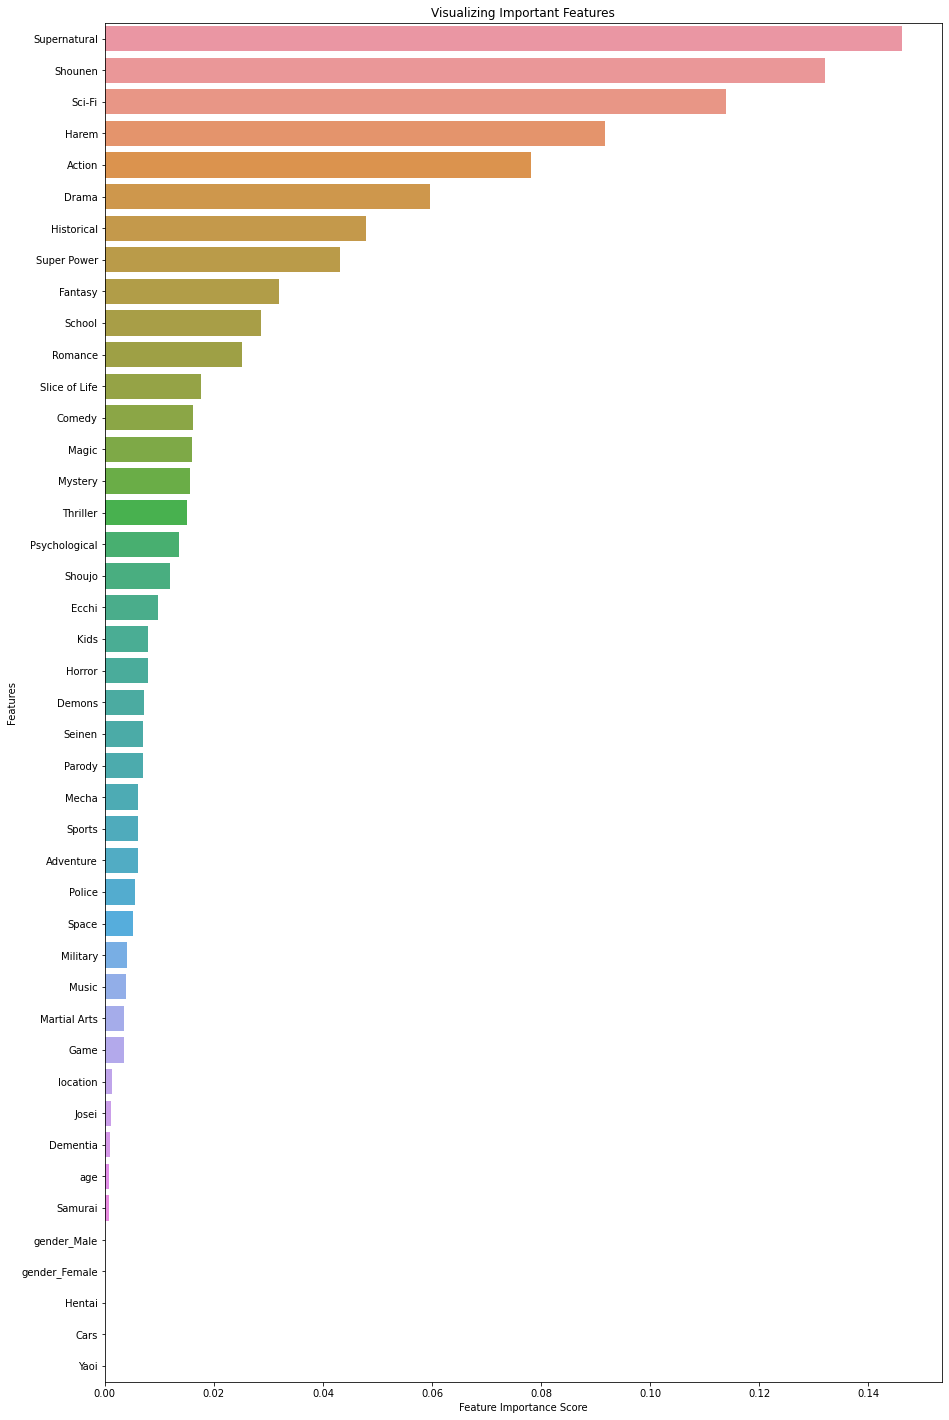

In [ ]:
#Visualize the Feature Importance
feat_impts = []
for i in range(len(y_test.columns)):
  feat_impts.append([clf.estimators_][0][i].feature_importances_)
feat_impts = pd.DataFrame(list(zip(X_test.columns,np.mean(feat_impts, axis=0)))).rename(columns={0:"Feature",1:'Importance'})
feat_impts = feat_impts.sort_values(by='Importance',ascending=False)
sns.barplot(x=feat_impts['Importance'], y=feat_impts['Feature'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in the true y.

In [ ]:
#Using Jaccard index, we can estimate each label Relevance probability (A intersect B / A union B)
print(jaccard_score(y_test, y_pred, average=None))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00105152 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00142146 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00093888 0.         

In [ ]:
df_model = list(zip(y_test.columns,jaccard_score(y_test, y_pred, average=None)))
df_model = pd.DataFrame(df_model)
df_model = pd.DataFrame(df_model).rename(columns={0:"anime_id",1:"Probability"})     

In [ ]:
local = df_anime_final['anime_id'][df_anime_final['anime_id'].isin(df_model['anime_id'])]
df_local = df_anime_final[df_anime_final['anime_id'].isin(local)]
df_model = pd.merge(df_model, df_local[['username','anime_id','my_score']], left_on = 'anime_id', right_on = 'anime_id', how = 'inner')
df_model['adjustesd_score'] = df_model.Probability * df_model.my_score
df_model.drop_duplicates(keep="first", inplace=False)
df_model_frac = df_model[df_model['Probability'] > 0]

In [ ]:
df_model_frac.head()

,anime_id,Probability,username,my_score,adjustesd_score
20590,27,0.001052,DarkMaga,7,0.007361
20591,27,0.001052,Tiisai_Kay,5,0.005258
20592,27,0.001052,INDYKU,6,0.006309
20593,27,0.001052,elsewherecw,7,0.007361
20594,27,0.001052,ManiTaku94,0,0.000000


In [ ]:
! pip install surprise
import surprise
import surprise as sp
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

     |████████████████████████████████| 11.8MB 8.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670919 sha256=dfe626037c7276581e257600876c9fc627e6238a08d72bb12ab746a118c63df8
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
kSplit = surprise.model_selection.split.KFold(n_splits=5, shuffle=True) # split data into folds. 
reader = Reader(rating_scale=(0, 10))
sim_options = {'name': 'cosine','user_based': False}  # compute  similarities between items
data = Dataset.load_from_df(df_model_frac[['username', 'anime_id', 'adjustesd_score']][df_model_frac['adjustesd_score']>0].sample(frac=0.01), reader)
analysis_df = []
algo = 0
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=2, verbose=False)
    temp_algo = pd.DataFrame.from_dict(results).mean(axis=0)
    if(algo > temp_algo[0]):
      algo = temp_algo[0]
      model = algorithm
    else:
      model = SVD()
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    analysis_df.append(tmp)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...


In [ ]:
analysis_df = pd.DataFrame(analysis_df).sort_values(by='test_rmse').reset_index(drop=True)
analysis_df['RMSE^-1'] = analysis_df['test_rmse'] ** -1
analysis_df

,test_rmse,fit_time,test_time,Algorithm,RMSE^-1
0,0.003702,0.001494,0.000493,KNNBaseline,270.146029
1,0.004003,0.000360,0.000417,BaselineOnly,249.790939
2,0.005305,0.001643,0.000487,KNNWithMeans,188.510662
3,0.005308,0.000908,0.000513,SlopeOne,188.392749
4,0.005310,0.000620,0.000603,KNNBasic,188.328993
5,0.005353,0.010837,0.000624,NMF,186.796085
6,0.005366,0.011495,0.000524,CoClustering,186.351870
7,0.005443,0.003790,0.000610,KNNWithZScore,183.720036
8,0.007574,0.000165,0.000642,NormalPredictor,132.025995
9,0.010203,0.005587,0.000494,SVD,98.015050


In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/datasets_anime/surprise_results.csv"
#surprise_results = pd.read_csv(path)
#surprise_results

The algorithm varies dependeing on the dataset

In [ ]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df_model[['username', 'anime_id', 'adjustesd_score']], reader)
trainset, testset = train_test_split(data, test_size=0.3)
algo = model
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.0048


0.004849195290972692

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [ ]:
df_user_best = df.sort_values(by='err')
df_user_worst = df.sort_values(by='err')

In [ ]:
df_user_best = pd.merge(df_user_best, df_anime_final.drop_duplicates(['title']), left_on = 'iid', right_on = 'anime_id', how = 'left')
df_user_worst = pd.merge(df_user_worst, df_anime_final.drop_duplicates(['title']), left_on = 'iid', right_on = 'anime_id', how = 'left')

In [ ]:
df_model = df_model[['anime_id','adjustesd_score']].groupby('anime_id').mean()

In [ ]:
df_user_best = pd.merge(df_user_best, df_model, left_on = 'anime_id', right_on = 'anime_id', how = 'inner').drop_duplicates(['title'])
df_user_worst = pd.merge(df_user_worst, df_model, left_on = 'anime_id', right_on = 'anime_id', how = 'inner').drop_duplicates(['title'])

In [ ]:
df_user_best = df_user_best.rename(columns={"genre_x":"Genre",'err':'residual_err'})
df_user_worst = df_user_worst.rename(columns={"genre_x":"Genre",'err':'residual_err'})

In [ ]:
df_user_best = df_user_best[['residual_err','adjustesd_score','anime_id','genre_1','score','popularity', 'title', 'Genre','image_url']]
df_user_worst = df_user_worst[['residual_err','adjustesd_score','anime_id','genre_1','score','popularity', 'title', 'Genre','image_url']]

In [ ]:
df_user_best = df_user_best.sort_values('adjustesd_score', ascending = False)[:30].reset_index(drop=True)
df_user_worst = df_user_worst.sort_values(by='adjustesd_score', ascending = False)[-30:].reset_index(drop=True)

FINALLY! THE RESULTS ARE IN!<br>
![](https://vip.socio-corp.jp/wp-content/uploads/sites/3/2014/10/ap-3.png?w=580) 

In [ ]:
#Top rated for this user
df_user_best[df_user_best['adjustesd_score']>0]

,residual_err,adjustesd_score,anime_id,genre_1,score,popularity,title,Genre,image_url
0,0.000106,0.016685,15809,Comedy,7.98,51,Hataraku Maou-sama!,"Comedy, Demons, Supernatural, Romance, Fantasy",https://myanimelist.cdn-dena.com/images/anime/...
1,0.000000,0.010708,14467,Action,7.68,121,K,"Action, Super Power, Supernatural",https://myanimelist.cdn-dena.com/images/anime/...
2,0.000000,0.010055,30831,Adventure,8.16,58,Kono Subarashii Sekai ni Shukufuku wo!,"Adventure, Comedy, Parody, Supernatural, Magic...",https://myanimelist.cdn-dena.com/images/anime/...
3,0.000000,0.009257,1686,Action,7.55,455,Bleach Movie 1: Memories of Nobody,"Action, Adventure, Super Power",https://myanimelist.cdn-dena.com/images/anime/...
4,0.000000,0.008425,2418,Action,8.40,463,Stranger: Mukou Hadan,"Action, Adventure, Historical, Samurai",https://myanimelist.cdn-dena.com/images/anime/...
5,0.000000,0.007746,572,Adventure,8.47,407,Kaze no Tani no Nausicaä,"Adventure, Fantasy",https://myanimelist.cdn-dena.com/images/anime/...
6,0.000000,0.006458,60,Action,7.76,485,Chrno Crusade,"Action, Historical, Demons, Supernatural, Romance",https://myanimelist.cdn-dena.com/images/anime/...
7,0.000000,0.006081,18229,Sci-Fi,7.42,631,Gatchaman Crowds,"Sci-Fi, Adventure",https://myanimelist.cdn-dena.com/images/anime/...
8,0.000000,0.005778,513,Adventure,8.38,364,Tenkuu no Shiro Laputa,"Adventure, Fantasy, Romance, Sci-Fi",https://myanimelist.cdn-dena.com/images/anime/...
9,0.000000,0.005651,11785,Sci-Fi,7.20,363,Haiyore! Nyaruko-san,"Sci-Fi, Comedy, Parody",https://myanimelist.cdn-dena.com/images/anime/...


In [ ]:
#Bottom rated for this user
df_user_worst

,residual_err,adjustesd_score,anime_id,genre_1,score,popularity,title,Genre,image_url
0,0.0,0.0,121,Action,8.29,21,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",https://myanimelist.cdn-dena.com/images/anime/...
1,0.0,0.0,8861,Drama,6.58,297,"Yosuga no Sora: In Solitude, Where We Are Leas...","Drama, Ecchi, Harem, Romance",https://myanimelist.cdn-dena.com/images/anime/...
2,0.0,0.0,174,Action,7.05,678,Tenjou Tenge,"Action, Ecchi, Martial Arts, Comedy, Super Pow...",https://myanimelist.cdn-dena.com/images/anime/...
3,0.0,0.0,18247,Action,6.79,375,IS: Infinite Stratos 2,"Action, Sci-Fi, Harem, Comedy, Ecchi, Mecha",https://myanimelist.cdn-dena.com/images/anime/...
4,0.0,0.0,9379,Sci-Fi,7.27,406,Denpa Onna to Seishun Otoko,"Sci-Fi, Slice of Life, Comedy",https://myanimelist.cdn-dena.com/images/anime/...
5,0.0,0.0,10588,Sci-Fi,7.63,479,Persona 4 the Animation,"Sci-Fi, Adventure, Mystery, Super Power, Super...",https://myanimelist.cdn-dena.com/images/anime/...
6,0.0,0.0,48,Game,7.09,650,.hack//Sign,"Game, Sci-Fi, Adventure, Mystery, Magic, Fantasy",https://myanimelist.cdn-dena.com/images/anime/...
7,0.0,0.0,20,Action,7.88,10,Naruto,"Action, Adventure, Comedy, Super Power, Martia...",https://myanimelist.cdn-dena.com/images/anime/...
8,0.0,0.0,21603,Sci-Fi,7.19,256,Mekakucity Actors,"Sci-Fi, Comedy, Super Power, Supernatural, Rom...",https://myanimelist.cdn-dena.com/images/anime/...
9,0.0,0.0,2236,Sci-Fi,8.35,113,Toki wo Kakeru Shoujo,"Sci-Fi, Adventure, Drama, Romance",https://myanimelist.cdn-dena.com/images/anime/...
